In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_train=pd.read_csv("Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
training_set=dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)
print(training_set_scaled)
print(training_set_scaled.shape)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]
(1258, 1)


In [7]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [8]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
print(x_train.shape)

(1198, 60, 1)


In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
regressor=Sequential()
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [15]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train, epochs=10,batch_size=32)

Epoch 1/10
38/38 [==============================] - 12s 118ms/step - loss: 0.0028
Epoch 2/10
38/38 [==============================] - 4s 112ms/step - loss: 0.0025
Epoch 3/10
38/38 [==============================] - 4s 99ms/step - loss: 0.0025
Epoch 4/10
38/38 [==============================] - 4s 106ms/step - loss: 0.0023
Epoch 5/10
38/38 [==============================] - 5s 124ms/step - loss: 0.0023
Epoch 6/10
38/38 [==============================] - 4s 99ms/step - loss: 0.0023
Epoch 7/10
38/38 [==============================] - 4s 99ms/step - loss: 0.0024
Epoch 8/10
38/38 [==============================] - 5s 132ms/step - loss: 0.0020
Epoch 9/10
38/38 [==============================] - 4s 99ms/step - loss: 0.0021
Epoch 10/10
38/38 [==============================] - 4s 99ms/step - loss: 0.0021


In [22]:
dataset_train=pd.read_csv("Google_Stock_Price_Train.csv")
actual_stock_price= dataset_train.iloc[:,1:2].values
print(actual_stock_price)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [23]:
dataset_total=pd.concat((dataset_train['Open'],dataset_train['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_train)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [24]:
predicted_stock_price=regressor.predict(x_train)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

38/38 [==============================] - 1s 29ms/step
[[317.86066]
 [319.80078]
 [321.46112]
 ...
 [782.59393]
 [781.7943 ]
 [780.76013]]


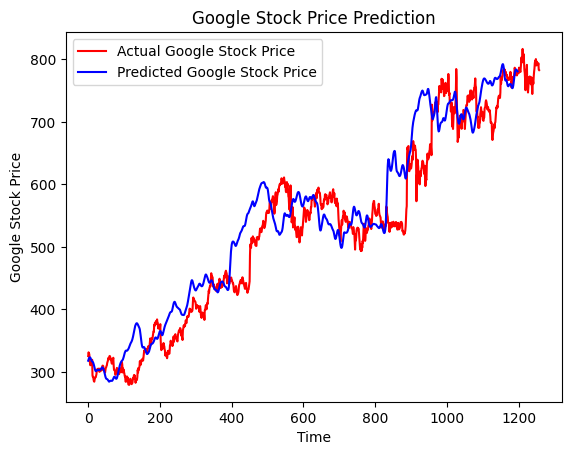

In [26]:
plt.plot(actual_stock_price,color='red',label='Actual Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()